In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score
from tqdm import tnrange
import matplotlib as mpl

In [2]:
true_mean = np.mean(np.load("/scratch/yjk27/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1_set1.npy"))
true = np.load("/scratch/yjk27/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1_set1.npy")[-20:,:50000]
true_train = np.load("/scratch/yjk27/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1_set1.npy")[:20,:50000]
gru_test = np.load("/scratch/yjk27/CA1_clust4-60/whole/gru_s10_h20_output.npz")["test"] + true_mean
tcn_test = np.load("/scratch/yjk27/CA1_clust4-60/whole/tcnmulti_l3_h40_output.npz")["test"] + true_mean
tcn_train = np.load("/scratch/yjk27/CA1_clust4-60/whole/tcnmulti_l3_h40_train_output.npz")["test"] + true_mean

In [3]:
var_exp_array = np.zeros((3,20))

for i in range(20):
    var_exp_array[0,i] = explained_variance_score(true[i], gru_test[i])
    var_exp_array[1,i] = explained_variance_score(true[i], tcn_test[i])
    var_exp_array[2,i] = explained_variance_score(true_train[i], tcn_train[i])


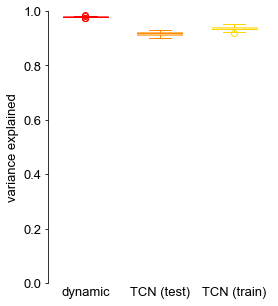

In [5]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.size'] = '13'

colors = ["red", "darkorange", "gold"]
cap_colors = ["red", "red", "darkorange", "darkorange", "gold", "gold"]
fig, ax = plt.subplots(figsize=(4,5))
bp = ax.boxplot(var_exp_array.T, positions = [1,2,3], widths = 0.6, patch_artist=True)
for i in range(var_exp_array.shape[0]):
    plt.setp(bp['boxes'][i], facecolor=colors[i])
    plt.setp(bp['boxes'][i], alpha=0.5)
    plt.setp(bp["fliers"][i], markeredgecolor=colors[i])
    plt.setp(bp["boxes"][i], color=colors[i])
    plt.setp(bp["medians"][i], color=colors[i])
for i in range(var_exp_array.shape[0]*2):
    plt.setp(bp['whiskers'][i], color=cap_colors[i])
    plt.setp(bp['caps'][i], color=cap_colors[i])

ax.set_ylim(0,1)
ax.set_xticks([1,2,3])
ax.tick_params(axis="x", length=0)
ax.set_xticklabels(["dynamic", "TCN (test)", "TCN (train)"],  rotation=0)
ax.set_ylabel("variance explained")
ax.margins(x=0.005, y=0.005)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

#plt.show()
#fig.savefig("/scratch/yjk27/dendrite/fig_tcn/fig_tcn_train.pdf", bbox_inches="tight", transparent=True)